<center><h1>Data Preprocessing - Data Analysis</h1></center>

### Data Preprocessing

It is used for maintaining the **Quality** of the data. It includes important factors like - 

* Selecting the valid data variables
* Data editing is important in some aspects
* Maintaining uniformity in data values
* Manipulation of the data for achieving the above factors (Data Wrangling)

<img src="https://miro.medium.com/max/1400/1*FXy7iopWSzMTJX1LoAlr5A.png">

<br>

**Credits** - Image from Internet

<center><h1>Classroom Management</h1></center>

Imagine you are the new teacher freshly appointed to manage the classroom.

You want to know how many students are good in - 

    1. sports
    2. academics
    3. creative work
    4. marketing

Based on the students data, you have to conclude **who** can do well in **what**.

### Dataset description

You are given the **data of the students** that included the following variables - 

* Age
* Gender
* Address
* Father's occupation
* Mother's occupation
* Place of birth
* Height - ft
* Weight - kg
* Prev sports performance
* Prev academics performance
* Voluntary experience
* Extra co-curricular activities
* Arts and Design

**Note** - For our conveneince all the data values are numericals.

How do we convert a **" feeling "** into a number?

* We can measure a **" feeling "** into a number through a **" scale range "**
* If the scale is **1** to **4**, then we can term - 
    - 1 → Not Satisfied
    - 2 → Slightly Satisfied
    - 3 → Satisfied
    - 4 → Highly Satisfied

### Sports

**Scenario 1**

Considering the variables that are direclty related - 

* Height
* Weight
* Prev sports performance

Based on this, you can only get the information of a student irrespective of **gender**.

**Scenario 2**

Considering the other important factors like **gender** in order to categorize as per **Male related sports** and **Female related sports**.

* Gender
* Height
* Weight
* Prev sports performance

1. Based on this, you can categorize the performance of students in sports by **Male** and **Female**.
2. Visually, you can represent it by drawing pie chart.

<img src="http://4.bp.blogspot.com/_cJl9tX6twx0/TJ-yejG4soI/AAAAAAAAAPg/ugTGsLz6Lwo/s1600/pie+chart+men+and+women+media..png">

<br>

**Credits** - Image from Internet

**Scenario 3**

If you want to do further research on how good the person is performing in other areas, you can do so by considering - 

* Gender
* Height
* Weight
* Prev sports performance
* Voluntary experience
* Extra co-curricular activities
* Prev academics performace (may be or may not be)

1. With this, you conclude the overall students performance on sports
2. Since you are a kind teacher and well wisher of student, you can give the student a proper career guidance.

### Academics

**Scenario 1**

Considering the variables that are directly related - 

* Prev academics peroformance

Based on this, you can only get the information of student irrespective of **gender**.

**Scenario 2**

Considering the other important factors like **gender** to categorize **Male** and **Female** separately.

* Gender
* Prev academics performance

1. Based on this, you can categorize the performance of students in academics by **Male** and **Female**.
2. Visually, you can represent it by drawing pie chart.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fak2.picdn.net%2Fshutterstock%2Fvideos%2F9595112%2Fthumb%2F11.jpg%3Fip%3Dx480&f=1&nofb=1">

<br>

**Credits** - Image from Internet

**Scenario 3**

If you want to further research on why a particular student is **lagging behind** or **excelling ahead**, you can do so by considering - 

* Address
* Father's occupation
* Mother's occupation
* Prev academics performance
* Gender (for categorizing in terms of gender)

and later on, you can decide whether to change your teaching methodology or not.

**Note** - 

* Data Analyst should be wise enough to select the important data variables.
* This helps to get proper insights pertaining to the problem statement that he/she is assigned to do.

### Let's make our hands dirty

Source → https://bit.ly/3g6AEPj

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_source = 'https://bit.ly/3g6AEPj'
# df
df = pd.read_csv(data_source)

In [3]:
# type
type(df)

pandas.core.frame.DataFrame

In [4]:
# head
df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


**Check the length of the `df`**

In [5]:
# shape
df.shape

(200, 2)

### Data Preprocessing

**Check for `NaN`**

In [6]:
# isnull().any()
df.isnull().any()

Height(Inches)    True
Weight(Pounds)    True
dtype: bool

In [7]:
# isnull().sum()
df.isnull().sum()

Height(Inches)    2
Weight(Pounds)    1
dtype: int64

In [8]:
# list of columns
df.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

**Things to read**

* What is dictionary in Python?
    - Keys and Values pairing. Refer to this [link](https://www.w3schools.com/python/python_dictionaries.asp).
* What is a function?
* How to define functions?
* How to call functions?
* Types of functions

In [9]:
for col in df.columns:
    print(col)

Height(Inches)
Weight(Pounds)


Hey Python, take help of `numpy` to locate the `NaN` values for each column in dataframe `df` and save it as a dictionary.

In [10]:
def get_nan_indices(dframe):
    """
    dframe → pandas data frame object
    returns `nan_places` a dictionary of column names and the `nan_indices`
    """
    nan_places = {}
    
    for col in dframe.columns:
        indices = list(np.where(dframe[col].isnull())[0])
        nan_places[col] = indices
    
    return nan_places

In [11]:
# function call
get_nan_indices(dframe=df)

{'Height(Inches)': [10, 32], 'Weight(Pounds)': [19]}

1. In the column `Height(Inches)`, there are two `NaN` values at indices `10` and `32`.
2. In the column `Weight(Pounds)`, there is one `NaN` value at index `19`.

**What can we do for those?**
- Remove the entire row which ever column has a `NaN`.

For this, we will remove the rows which ever column has `NaN`. In total, there are 3 rows that need to be removed.

**Remove 3 rows**

* axis (0) → row
* axis (1) → column

In [12]:
# removing by index
df_1 = df.drop(index=[10, 19, 32], axis=0)

In [13]:
df_1.shape

(197, 2)

In [14]:
# dropna - pdf
pdf = df.dropna(axis=0)

**Check the length of `pdf`**

In [15]:
# shape
pdf.shape

(197, 2)

Since the index of the data frame is not in order, we need to reindex the index values to get the perfect order.

In [16]:
# head(12)
pdf.head(12)

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30
5,68.70,123.30
6,69.80,141.49
7,70.01,136.46
8,67.90,112.37
9,66.78,120.67


**Reset the index**

In [17]:
# rdf
# reset with drop
rdf = pdf.reset_index(drop=True)

In [18]:
# shape
rdf.shape

(197, 2)

**Check if `Height(Inches)` < 40**

In [19]:
# inch_thresh
inch_thresh = 40

In [20]:
# filter with <
rdf[rdf['Height(Inches)'] < inch_thresh]

,Height(Inches),Weight(Pounds)
68,30.84,134.02
93,36.29,120.03


**Remove the rows where `Height(Inches)` < 40**

* In the above case, we can see two values where height is less than 40.
* We remove by specifying the index values in `drop()` method.

In [21]:
# drop by index
rdf = rdf.drop(index=[68, 93], axis=0)

In [22]:
# shape
rdf.shape

(195, 2)

**Reset the index**

In [23]:
# hw_df
# drop = True
hw_df = rdf.reset_index(drop=True)

In [24]:
# shape
hw_df.shape

(195, 2)

Since the index of the data frame is not in order, we need to reindex the index values to get the perfect order.

### Categorize the data

* Refer to → https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [25]:
# head
hw_df.head()

,Height(Inches),Weight(Pounds)
0,65.78,112.99
1,71.52,136.49
2,69.40,153.03
3,68.22,142.34
4,67.79,144.30


In [26]:
# height_cat
# weight_cat

height_cat = pd.cut(x=hw_df['Height(Inches)'], bins=3, labels=['short', 'average', 'tall'])
weight_cat = pd.cut(x=hw_df['Weight(Pounds)'], bins=3, labels=['under', 'normal', 'obesity'])

**Make a new column `height_cat` and `weight_cat` in the dataframe - `hw_df`**

In [27]:
# make new columns
hw_df['height_cat'] = height_cat
hw_df['weight_cat'] = weight_cat

In [28]:
# head
hw_df.head()

,Height(Inches),Weight(Pounds),height_cat,weight_cat
0,65.78,112.99,short,under
1,71.52,136.49,tall,normal
2,69.40,153.03,average,obesity
3,68.22,142.34,average,obesity
4,67.79,144.30,average,obesity


**Plotting the pie chart to show**

* how many are short
* how many are tall
* . . .

**Take `value_counts()` of `height_cat` variable**

In [29]:
hw_df['height_cat'].value_counts()

average    118
short       60
tall        17
Name: height_cat, dtype: int64

**Take `value_counts()` of `weight_cat` variable**

In [30]:
hw_df['weight_cat'].value_counts()

normal     114
under       44
obesity     37
Name: weight_cat, dtype: int64

In [31]:
# hdf_pie → to_frame
# wdf_pie → to_frame

hdf_pie = hw_df['height_cat'].value_counts().to_frame()
wdf_pie = hw_df['weight_cat'].value_counts().to_frame()

In [32]:
# display hdf_pie
hdf_pie

,height_cat
average,118
short,60
tall,17


In [33]:
# display wdf_pie
wdf_pie

,weight_cat
normal,114
under,44
obesity,37


array([<AxesSubplot:ylabel='height_cat'>], dtype=object)

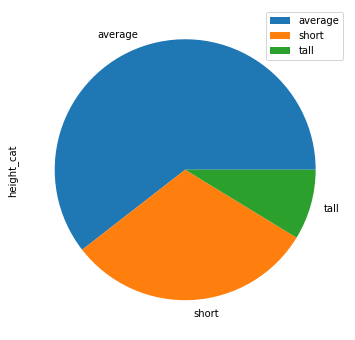

In [34]:
# plot pie of hdf_pie with size (width=10, height=6)
hdf_pie.plot(kind='pie', figsize=(10, 6), subplots=True)

array([<AxesSubplot:ylabel='weight_cat'>], dtype=object)

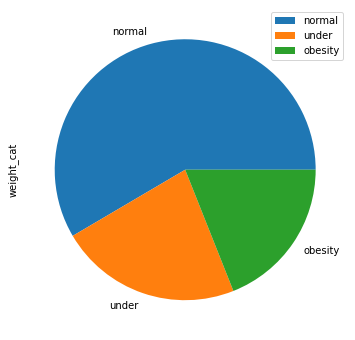

In [35]:
# plot pie of wdf_pie with size (width=10, height=6)
wdf_pie.plot(kind='pie', figsize=(10, 6), subplots=True)

### What did we learn?

* Data Preprocessing
* Real life scenario Example
* Classroom Management problem
    - sports
    - academics
    - creative work
    - marketing
* Getting hands dirty by writing code
* Plotting the pie chart for showing categorization